In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

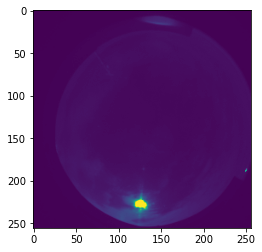

In [30]:
img= cv2.imread('/Volumes/Garrys_T7/themis_video_generator/rank20200104000000.pgm', 0)
plt.imshow(img)
plt.show()

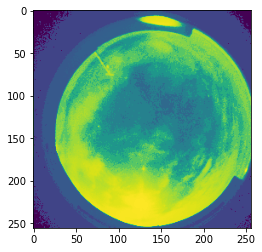

In [32]:
def _eqhist(img):
    img = cv2.equalizeHist(img) # equalize histogram
    return img

img = _eqhist(img)
plt.imshow(img)
plt.show()

In [11]:
def _bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError(
            "`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

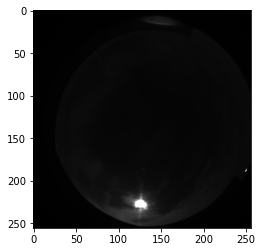

In [18]:
bs_img = _bytescale(img)
bs_img = (bs_img // 256)
bs_img = np.uint8(bs_img)
plt.imshow(bs_img)
plt.show()

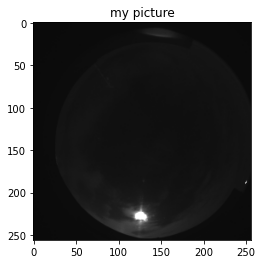

In [21]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.title('my picture')
plt.show()

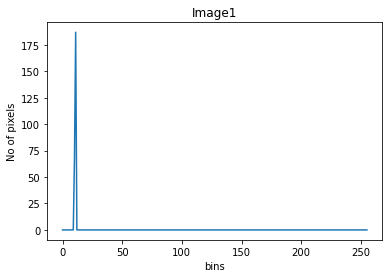

In [4]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)

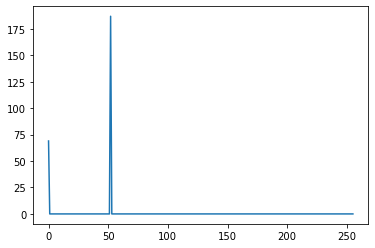

In [22]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.plot(hist)

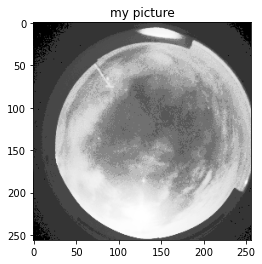

In [23]:
plt.imshow(gray_img_eqhist, cmap='gray', vmin=0, vmax=255)
plt.title('my picture')
plt.show()

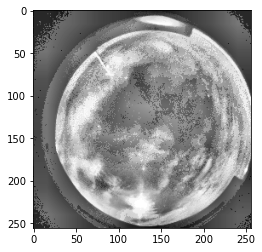

In [7]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
plt.imshow(gray_img_clahe, cmap='gray', vmin=0, vmax=255)

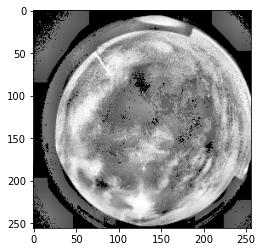

In [8]:
th=80
max_val=255
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
plt.imshow(o3, cmap='gray', vmin=0, vmax=255)